In [1]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from datetime import datetime
from citipy import citipy
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations (use zip function create a zipped tuple).
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs= np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [5]:
# Starting URL for weather map API call.
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | yzeure
Processing Record 4 of Set 1 | san quintin
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | nuuk
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | itarema
Processing Record 10 of Set 1 | komsomolskiy
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | aguilar de la frontera
Processing Record 13 of Set 1 | pangnirtung
Processing Record 14 of Set 1 | samusu
City not found. Skipping...
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | ancud
Processing Record 18 of Set 1 | sinkat
City not found. Skipping...
Processing Record 19 of Set 1 | olafsvik
Processing Record 20 of Set 1 | belushya guba
City not found. Skipping...
P

Processing Record 37 of Set 4 | comodoro rivadavia
Processing Record 38 of Set 4 | cabo san lucas
Processing Record 39 of Set 4 | nyurba
Processing Record 40 of Set 4 | pakxe
Processing Record 41 of Set 4 | chapais
Processing Record 42 of Set 4 | rosetta
Processing Record 43 of Set 4 | gursarai
Processing Record 44 of Set 4 | georgetown
Processing Record 45 of Set 4 | isabela
Processing Record 46 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 47 of Set 4 | luwuk
Processing Record 48 of Set 4 | novopokrovka
Processing Record 49 of Set 4 | saint-hyacinthe
Processing Record 50 of Set 4 | bethel
Processing Record 1 of Set 5 | san carlos de bariloche
Processing Record 2 of Set 5 | luderitz
Processing Record 3 of Set 5 | arkhipo-osipovka
Processing Record 4 of Set 5 | tuktoyaktuk
Processing Record 5 of Set 5 | angoche
Processing Record 6 of Set 5 | hovd
Processing Record 7 of Set 5 | boguchany
Processing Record 8 of Set 5 | north bend
Processing Record 9 of Set 5 | boa vis

Processing Record 27 of Set 8 | zatoka
Processing Record 28 of Set 8 | ust-nera
Processing Record 29 of Set 8 | port hardy
Processing Record 30 of Set 8 | birao
Processing Record 31 of Set 8 | drayton valley
Processing Record 32 of Set 8 | tondano
Processing Record 33 of Set 8 | oyama
Processing Record 34 of Set 8 | bourail
Processing Record 35 of Set 8 | panaba
Processing Record 36 of Set 8 | pindi bhattian
Processing Record 37 of Set 8 | santa fe
Processing Record 38 of Set 8 | boende
Processing Record 39 of Set 8 | burica
City not found. Skipping...
Processing Record 40 of Set 8 | ust-tsilma
Processing Record 41 of Set 8 | portland
Processing Record 42 of Set 8 | san blas
Processing Record 43 of Set 8 | temaraia
City not found. Skipping...
Processing Record 44 of Set 8 | kuruksay
City not found. Skipping...
Processing Record 45 of Set 8 | hattem
Processing Record 46 of Set 8 | nador
Processing Record 47 of Set 8 | bubaque
Processing Record 48 of Set 8 | le havre
Processing Record 49

Processing Record 14 of Set 12 | verkhoyansk
Processing Record 15 of Set 12 | carballo
Processing Record 16 of Set 12 | jumla
Processing Record 17 of Set 12 | port blair
Processing Record 18 of Set 12 | maceio
Processing Record 19 of Set 12 | norsup
Processing Record 20 of Set 12 | aleksandrovka
Processing Record 21 of Set 12 | kaitangata
Processing Record 22 of Set 12 | ornskoldsvik
Processing Record 23 of Set 12 | sroda wielkopolska
Processing Record 24 of Set 12 | prince rupert
Processing Record 25 of Set 12 | cochrane
Processing Record 26 of Set 12 | san pedro de macoris
Processing Record 27 of Set 12 | tabuk
Processing Record 28 of Set 12 | vreed en hoop
City not found. Skipping...
Processing Record 29 of Set 12 | djambala
Processing Record 30 of Set 12 | ulmi
Processing Record 31 of Set 12 | staryy nadym
Processing Record 32 of Set 12 | guane
Processing Record 33 of Set 12 | abu samrah
Processing Record 34 of Set 12 | wagga wagga
Processing Record 35 of Set 12 | alanya
Processing

In [7]:
city_data

[{'City': 'Albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 84.15,
  'Humidity': 74,
  'Cloudiness': 45,
  'Wind Speed': 7.23,
  'Country': 'US',
  'Date': '2021-08-10 16:00:21'},
 {'City': 'Rikitea',
  'Lat': -23.1203,
  'Lng': -134.9692,
  'Max Temp': 69.84,
  'Humidity': 66,
  'Cloudiness': 2,
  'Wind Speed': 17.2,
  'Country': 'PF',
  'Date': '2021-08-10 16:03:47'},
 {'City': 'Yzeure',
  'Lat': 46.5644,
  'Lng': 3.355,
  'Max Temp': 84.18,
  'Humidity': 41,
  'Cloudiness': 0,
  'Wind Speed': 4.23,
  'Country': 'FR',
  'Date': '2021-08-10 16:03:48'},
 {'City': 'San Quintin',
  'Lat': 30.4833,
  'Lng': -115.95,
  'Max Temp': 73.2,
  'Humidity': 73,
  'Cloudiness': 2,
  'Wind Speed': 7.25,
  'Country': 'MX',
  'Date': '2021-08-10 16:03:48'},
 {'City': 'Barrow',
  'Lat': 71.2906,
  'Lng': -156.7887,
  'Max Temp': 37.42,
  'Humidity': 75,
  'Cloudiness': 90,
  'Wind Speed': 6.91,
  'Country': 'US',
  'Date': '2021-08-10 16:03:49'},
 {'City': 'Nuuk',
  'Lat': 64.1835,
  'Lng':

In [8]:
#6.2.7 Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,84.15,74,45,7.23,US,2021-08-10 16:00:21
1,Rikitea,-23.1203,-134.9692,69.84,66,2,17.20,PF,2021-08-10 16:03:47
2,Yzeure,46.5644,3.3550,84.18,41,0,4.23,FR,2021-08-10 16:03:48
3,San Quintin,30.4833,-115.9500,73.20,73,2,7.25,MX,2021-08-10 16:03:48
4,Barrow,71.2906,-156.7887,37.42,75,90,6.91,US,2021-08-10 16:03:49


In [9]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [10]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2021-08-10 16:00:21,42.6001,-73.9662,84.15,74,45,7.23
1,Rikitea,PF,2021-08-10 16:03:47,-23.1203,-134.9692,69.84,66,2,17.20
2,Yzeure,FR,2021-08-10 16:03:48,46.5644,3.3550,84.18,41,0,4.23
3,San Quintin,MX,2021-08-10 16:03:48,30.4833,-115.9500,73.20,73,2,7.25
4,Barrow,US,2021-08-10 16:03:49,71.2906,-156.7887,37.42,75,90,6.91


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
#6.3.1 Latitude vs temperature

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

# import time module
import time

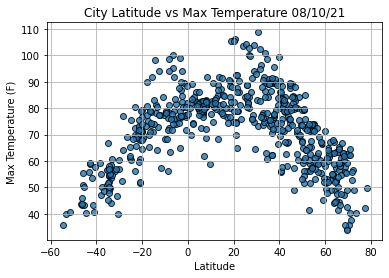

In [13]:
# create scatter plot for latitude vs temperature
plt.scatter(lats, max_temps,edgecolor='black', linewidths=1, marker='o',alpha=0.8, label='Cities' )
plt.title(f"City Latitude vs Max Temperature "+time.strftime('%x'))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("Weather_data/Fig1.png")

plt.show()

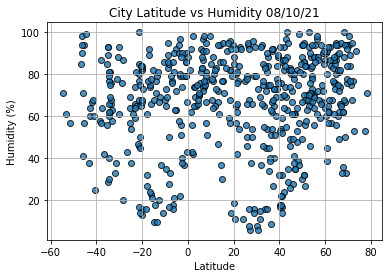

In [14]:
#6.3.2 Latitude vs humidity
plt.scatter(lats, humidity,edgecolor='black', linewidths=1, marker='o',alpha=0.8, label='Cities' )
plt.title(f"City Latitude vs Humidity "+time.strftime('%x'))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("Weather_data/Fig2.png")

plt.show()

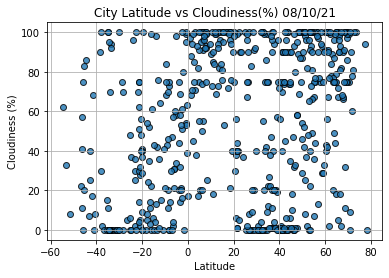

In [15]:
#6.3.3 Latitude vs cloudiness
plt.scatter(lats, cloudiness,edgecolor='black', linewidths=1, marker='o',alpha=0.8, label='Cities' )
plt.title(f"City Latitude vs Cloudiness(%) "+time.strftime('%x'))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("Weather_data/Fig3.png")

plt.show()

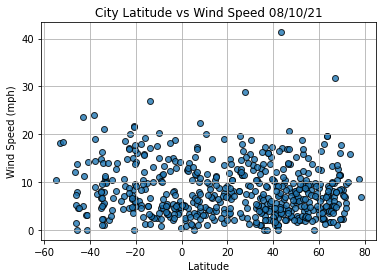

In [16]:
#6.3.3 Latitude vs wind speed
plt.scatter(lats, wind_speed,edgecolor='black', linewidths=1, marker='o',alpha=0.8, label='Cities' )
plt.title(f"City Latitude vs Wind Speed "+time.strftime('%x'))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save figure
plt.savefig("Weather_data/Fig4.png")

plt.show()

In [17]:
#6.4.1 Determine correlation - Linear Regression
from scipy.stats import linregress

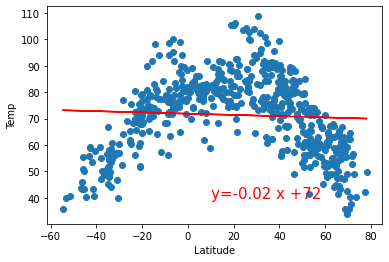

In [20]:
# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

# Perform linear regression. saving the output as tuple
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats*slope + intercept

# Get the equation of the line.
line_eq = 'y=' + str(round(slope,2)) +' x +' + str(round(intercept))

# Create a scatter plot of the x and y values.
plt.scatter(lats,max_temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [51]:
linregress(lats, max_temps)

LinregressResult(slope=-0.02370182050270596, intercept=71.85695374766325, rvalue=-0.053897822525307844, pvalue=0.20121709007364666, stderr=0.018522969074260764, intercept_stderr=0.7335048883812079)

In [70]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values,"r")
    # Annotate the text for the line equations
    plt.annotate(line_eq, text_coordinates, fontsize=15, color='red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"r-value us: {r_value:.3f}")

In [71]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
sorthern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]
sorthern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Rikitea,PF,2021-08-10 16:03:47,-23.1203,-134.9692,69.84,66,2,17.20
6,Arraial Do Cabo,BR,2021-08-10 16:03:49,-22.9661,-42.0278,72.64,74,30,16.87
7,Itarema,BR,2021-08-10 16:03:49,-2.9248,-39.9167,86.85,56,21,18.72
12,Mataura,NZ,2021-08-10 16:03:51,-46.1927,168.8643,43.48,98,41,1.50
14,Ancud,CL,2021-08-10 16:03:52,-41.8697,-73.8203,53.42,67,17,3.11


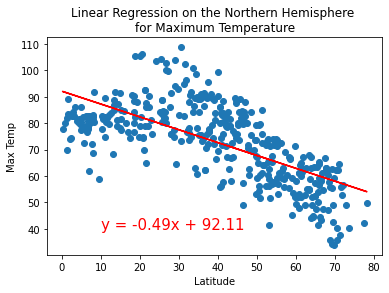

r-value us: -0.674


In [72]:
# Linear Regression on the Maximum Temperature for the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function 
plot_linear_regression(x_values,
                       y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature',
                       'Max Temp',
                       (10,40))

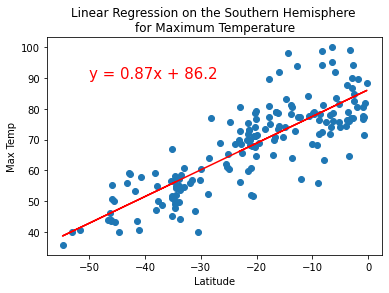

r-value us: 0.829


In [73]:
# Linear regression on the Southern Hemisphere
x_values = sorthern_hemi_df["Lat"]
y_values = sorthern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

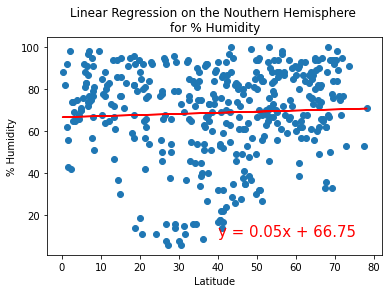

r-value us: 0.048


In [75]:
# 6.4.3 Correlation Between Latitude and Percent Humidity

# Linear regression on the Nouthern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Nouthern Hemisphere \nfor % Humidity', '% Humidity',(40,10))


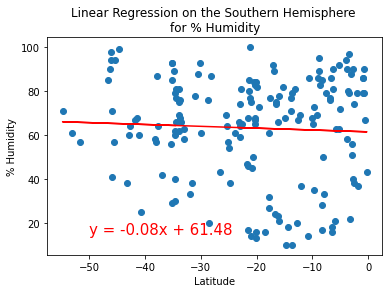

r-value us: -0.049


In [77]:
# Linear regression on the Southern Hemisphere
x_values = sorthern_hemi_df["Lat"]
y_values = sorthern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

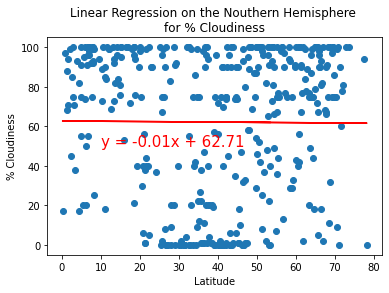

r-value us: -0.008


In [81]:
#6.4.4 Correlation Between Latitude and Percent Cloudiness

# Linear regression on the Nouthern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Nouthern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,50))

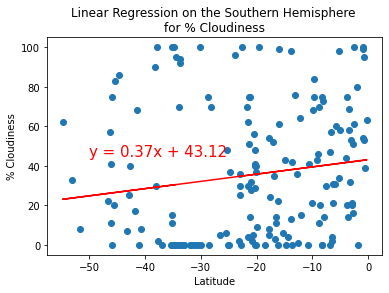

r-value us: 0.153


In [85]:
# Linear regression on the Southern Hemisphere
x_values = sorthern_hemi_df["Lat"]
y_values = sorthern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,45))

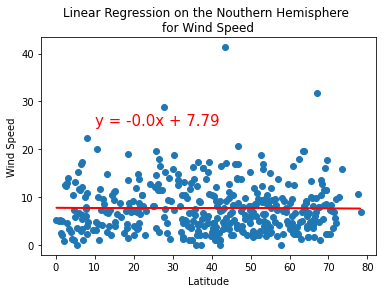

r-value us: -0.009


In [88]:
# 6.4.5 Correlation Between Latitude and Wind Speed

# Linear regression on the Nouthern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Nouthern Hemisphere \nfor Wind Speed', 'Wind Speed',(10,25))

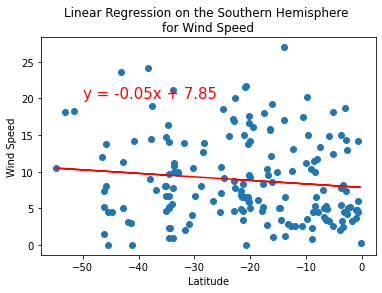

r-value us: -0.114


In [91]:
# Linear regression on the Southern Hemisphere
x_values = sorthern_hemi_df["Lat"]
y_values = sorthern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,20))